In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('temps.csv')

In [0]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [0]:
print('The shape of our df is: ', df.shape)

The shape of our df is:  (348, 12)


In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,348.0,2016.000000,0.000000,2016.0,2016.000,2016.0,2016.000,2016.0
month,348.0,6.477011,3.498380,1.0,3.000,6.0,10.000,12.0
day,348.0,15.514368,8.772982,1.0,8.000,15.0,23.000,31.0
temp_2,348.0,62.652299,12.165398,35.0,54.000,62.5,71.000,117.0
temp_1,348.0,62.701149,12.120542,35.0,54.000,62.5,71.000,117.0
average,348.0,59.760632,10.527306,45.1,49.975,58.2,69.025,77.4
actual,348.0,62.543103,11.794146,35.0,54.000,62.5,71.000,92.0
forecast_noaa,348.0,57.238506,10.605746,41.0,48.000,56.0,66.000,77.0
forecast_acc,348.0,62.373563,10.549381,46.0,53.000,61.0,72.000,82.0
forecast_under,348.0,59.772989,10.705256,44.0,50.000,58.0,69.000,79.0


In [0]:
import datetime

#getting years,months and years
years = df.year
months = df.month
days = df.day

#list and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-'  + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

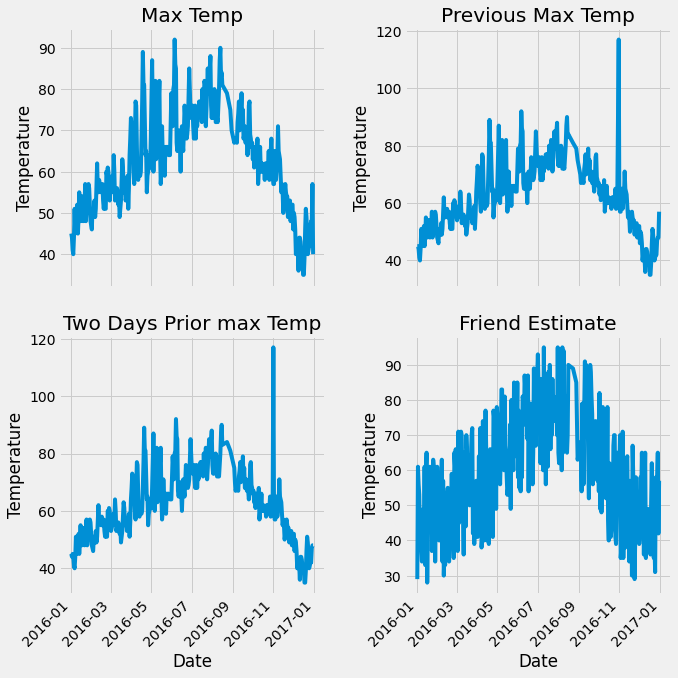

In [0]:
plt.style.use('fivethirtyeight')

#visualizing the data
#set up the plotting layout
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

ax1.plot(dates, df['actual'])
ax1.set_xlabel('');
ax1.set_ylabel('Temperature');
ax1.set_title('Max Temp')

ax2.plot(dates, df['temp_1'])
ax2.set_xlabel('');
ax2.set_ylabel('Temperature');
ax2.set_title('Previous Max Temp')

print('\n')

ax3.plot(dates, df['temp_2'])
ax3.set_xlabel('Date');
ax3.set_ylabel('Temperature');
ax3.set_title('Two Days Prior max Temp')

ax4.plot(dates, df['friend'])
ax4.set_xlabel('Date');
ax4.set_ylabel('Temperature');
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)





In [0]:
df = pd.get_dummies(df)

In [0]:
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [0]:
print('shape of features after one-hot encoding: ', df.shape)

shape of features after one-hot encoding:  (348, 18)


In [0]:
df.dtypes

year                int64
month               int64
day                 int64
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
week_Fri            uint8
week_Mon            uint8
week_Sat            uint8
week_Sun            uint8
week_Thurs          uint8
week_Tues           uint8
week_Wed            uint8
dtype: object

In [0]:
labels = np.array(df['actual'])

In [0]:
features = df.drop('actual',axis = 1)

In [0]:
features_list = list(df.columns)
features = np.array(features)

In [0]:
list(df.columns)

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'actual',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [0]:
len(df[df['month']>9])

91

In [0]:
train_all = df.copy()
train = train_all.loc[train_all.month <= 9]
valid = train_all.loc[train_all.month > 9]
print(train.shape,valid.shape)

(257, 18) (91, 18)


In [0]:
target_col = features_list.pop(6)
in_cols = features_list

In [0]:
len(features_list)

17

In [0]:
X_train,y_train = train[in_cols], train[target_col]
X_valid,y_valid = valid[in_cols], valid[target_col]

In [0]:
print('Training features Shape:',X_train.shape)
print('Training labels Shape:', y_train.shape)
print('Testing Features Shape:', X_valid.shape)
print('Testing Labels Shape:', y_valid.shape)



Training features Shape: (257, 17)
Training labels Shape: (257,)
Testing Features Shape: (91, 17)
Testing Labels Shape: (91,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_features,test_features ,train_labels, test_labels = train_test_split(features,
                                                                           labels,
                                                                           test_size= 0.25,
                                                                           random_state = 42)

In [0]:
baseline_preds = test_features[:, features_list.index('average')]


baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors),2),'degrees.')

Average baseline error:  5.06 degrees.


In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000,random_state=42)

rf.fit(X_train,y_train);

In [0]:
predictions = rf.predict(X_valid)

errors = abs(predictions - y_valid)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.57 degrees.


In [0]:
mape = 100*(errors/y_valid)

accuracy = 100 - np.mean(mape)
print('Accuracy:',round(accuracy,2), '%.')

Accuracy: 92.92 %.


In [0]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')

pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.1min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [0]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 3.72 degrees.
Accuracy = 94.20%.
